# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nbuser/anaconda3_420/lib/pyth

## Load the data

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [30]:
X_train[0].shape

(28, 28)

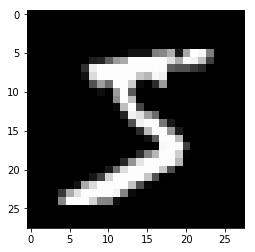

In [31]:
plt.imshow(X_train[0], cmap='gray')

In [32]:
y_train[0]

5

## Preprocessing the image data

In [33]:
image_height, image_width = 28, 28

In [34]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape, '\n', X_test.shape)

(60000, 784) 
 (10000, 784)


In [35]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [36]:
X_train /= 255
X_test /= 255
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [38]:
print(y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

5
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Build a model

![](./Piks/neural-net.png)

In [39]:
model = Sequential()

In [40]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [47]:
#First layer: 784 pixels * 512 nodes + 521 biases
784*512 + 512

401920

In [48]:
#Second layer
512*512 + 512

262656

In [50]:
#Third layer
512*10 + 10

5130

In [51]:
#Total:
401920 + 262656 + 512*10 + 10

669706

## Train the model

In [52]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 51s - loss: 0.1839 - acc: 0.9433 - val_loss: 0.0994 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 54s - loss: 0.0788 - acc: 0.9752 - val_loss: 0.0869 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 53s - loss: 0.0567 - acc: 0.9822 - val_loss: 0.0880 - val_acc: 0.9742
Epoch 4/20
60000/60000 [==============================] - 56s - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0899 - val_acc: 0.9728
Epoch 5/20
60000/60000 [==============================] - 59s - loss: 0.0348 - acc: 0.9890 - val_loss: 0.0826 - val_acc: 0.9791
Epoch 6/20
60000/60000 [==============================] - 60s - loss: 0.0298 - acc: 0.9905 - val_loss: 0.0759 - val_acc: 0.9814
Epoch 7/20
60000/60000 [==============================] - 59s - loss: 0.0262 - acc: 0.9920 - val_loss: 0.0867 - val_acc: 0.9791
Epoch 8/20
60000/60000 [==============================

## What is the accuracy of the model?

### Plot the accuracy of the training model

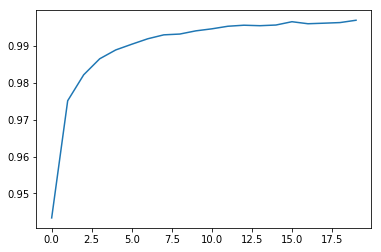

In [53]:
plt.plot(history.history['acc'])

### Plot the accuracy of training and validation set

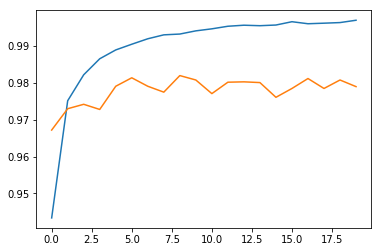

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

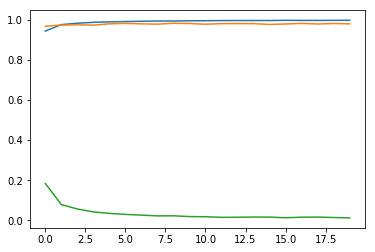

In [56]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

## Run a prediction

In [57]:
score = model.evaluate(X_test, y_test)

 9824/10000 [============================>.] - ETA: 0s

In [58]:
score

[0.13805308277054795, 0.979]

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?